<a href="https://colab.research.google.com/github/mahdiehhojabri/Reuters-Newswires-Classification/blob/main/Reuters_data_Newswires_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading data

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
#preprocessing

import numpy as np
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)        

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
x_test.shape

(2246, 10000)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# Network architecture

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
#Comfiguring learning process

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
#Training

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,partial_y_train, epochs=20,batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 3.1187 - accuracy: 0.4019 - val_loss: 1.7497 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.5137 - accuracy: 0.7053 - val_loss: 1.3346 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0890 - accuracy: 0.7726 - val_loss: 1.1652 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8472 - accuracy: 0.8250 - val_loss: 1.0755 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6493 - accuracy: 0.8599 - val_loss: 0.9947 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5397 - accuracy: 0.8893 - val_loss: 0.9635 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4307 - accuracy: 0.9106 - val_loss: 0.9273 - val_accuracy: 0.8210
Epoch 8/20
16

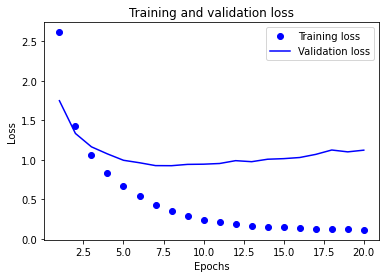

In [ ]:
# Training and Validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

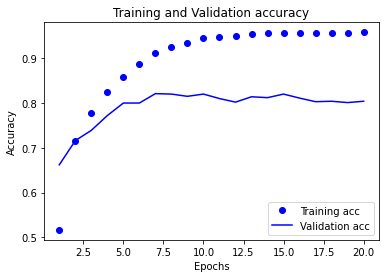

In [ ]:
# Training and Validation accuracy

plt.clf()

acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Retrain

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 


model.fit(partial_x_train,partial_y_train, epochs = 9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
results 

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 3.1806 - accuracy: 0.3979
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4654 - accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0980 - accuracy: 0.7763
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8429 - accuracy: 0.8213
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6604 - accuracy: 0.8583
Epoch 6/9
16/16 [==============================] - 1s 42ms/step - loss: 0.5204 - accuracy: 0.8911
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4174 - accuracy: 0.9120
Epoch 8/9
16/16 [==============================] - 1s 43ms/step - loss: 0.3520 - accuracy: 0.9243
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9541 - accuracy: 0.7934


[0.9541206955909729, 0.7934104800224304]

In [ ]:
prediction = model.predict(x_test)
prediction

array([[6.8573238e-05, 7.0808246e-04, 1.7738765e-05, ..., 4.8079580e-04,
        1.6156182e-05, 6.6419079e-06],
       [1.7744422e-02, 1.0455608e-01, 9.7114509e-03, ..., 1.5059682e-04,
        1.7699753e-06, 1.2471207e-04],
       [4.4627627e-03, 5.4878187e-01, 1.6695825e-02, ..., 4.6386784e-03,
        1.8388753e-04, 5.1393814e-04],
       ...,
       [2.0104244e-05, 2.6143412e-04, 2.7054688e-05, ..., 1.0413352e-04,
        1.0229982e-04, 3.5707164e-06],
       [1.6767139e-03, 1.6868867e-01, 2.6338170e-03, ..., 3.2946144e-03,
        2.2442166e-03, 4.9228355e-04],
       [3.2030485e-04, 7.2201335e-01, 1.8666742e-02, ..., 6.7314215e-04,
        3.4337532e-05, 5.5662444e-05]], dtype=float32)

In [ ]:
prediction[0].shape

(46,)

In [ ]:
np.sum(prediction[0])

0.99999976

In [ ]:
np.argmax(prediction[0])

3